#### Equipo: 2                        Grupo: 002

Integrantes:

1732753 Altamirano Romo Lizbeth Guadalupe

1725005 García Tamez Juan Manuel

1813599 González Baltazar Joel Gerardo

1797033 Herrera Dueñas Roberto Eduardo

# Pokemon

### 1) Título de Base de Datos

a) Pokemon Stats

b) www.kaggle.com/abcsds/pokemon

### 2) Descripción de los datos 

Número de Pokedex (INT)

Nombre de Pokemon (STRING)

Tipo 1 (STRING)

Tipo 2 (STRING)

Total (INT)

HP (INT)

Attack (INT)

Defense (INT)

Sp. Atk (INT)

Sp. Def (INT)

Speed (INT)

### 3) Justificación del uso de datos


Lo primero que nos llamo la atención de esta base de datos es que conocemos casi todos los datos y sabemos de que trata el juego, debido a esto nos llamo la atención de los puntajes de ataque y defensa, y con estos datos númericos poder manipularlos para llegar a un objetivo.

### 4) Objetivo Final 

OBJETIVO PRINCIPAL:
Pronosticar el pokemon que debemos usar para lograr ganar algún tipo de combate tomando en cuenta el tipo de pokemon, el puntaje total, el ataque y la defensa.

OBJETIVO SECUNDARIO:
Ordenar los pokemon por tipo (agua, fuego, tierra, lucha, etc).
Seleccionar 3 de cada tipo y mostrar cual es el mas eficaz.


### 5 Preguntas de Interes

¿Cuáles son los de mayor eficaz respecto a otro?

¿Por qué la eficacia es mayor? 

## Desarrollo de las herramientas 


In [2]:
import pandas as pd
d = pd.read_csv('Pokemon.csv')
d.head() #muestra las primeras 4 filas de la base de datos

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [3]:
d.tail() #muestra las ultimas 4 filas de la base de datos

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


In [4]:
pokem = pd.read_csv('Pokemon.csv')
import seaborn as sns
import matplotlib.pyplot as plt

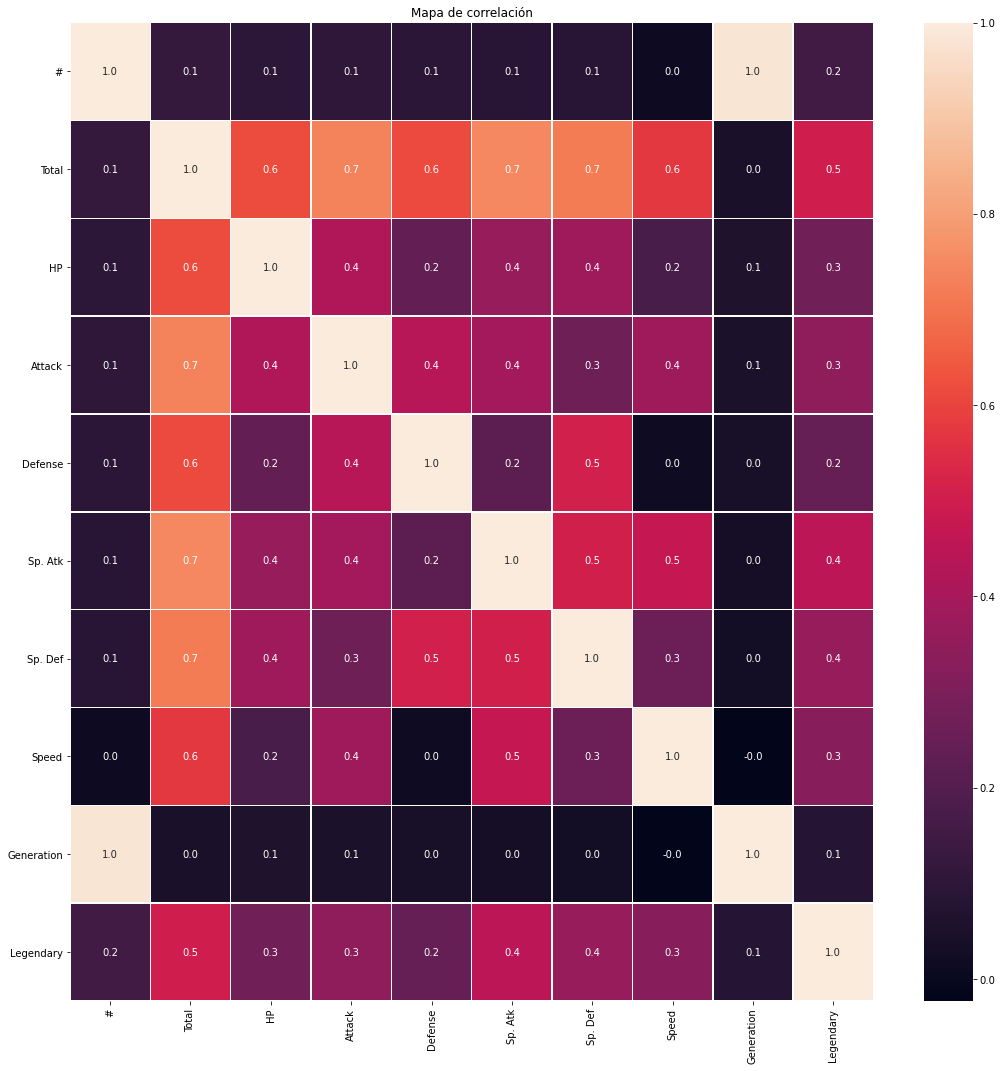

In [5]:
f,ax=plt.subplots(figsize = (18,18))
sns.heatmap(pokem.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Mapa de correlación')
plt.savefig('graph.png')
plt.show()

En los datos de correlación observamos que el numero de pokemon, el total, el legnedario y la generacion tiene datos muy bajos en la correlación por ende podemos eliminar esas columnas dado que no afectan en nuestros datos.

1. Limpieza de datos

Datos sin manipulación, en esta parte solo se muestran los datos excatamente iguales exportados de excel a python.

En este siguiente paso se eliminan las columnas que no son necesarias para realizar nuestro objetivo.

In [6]:
d.drop(columns='Legendary',inplace=True) #Se elimina la columan llamada LEGENDARY
d.drop(columns='Generation',inplace=True) #Se elimina la columna llamada GENERATION
d.head() #se muestran las primeras 4 filas son las columnas eliminadas.

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65


In [7]:
d.tail() #se muetsran las ultimas 4 filas sin las columnas eliminadas

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70


In [8]:
d.isnull().any() #Datos vacios sin manipulación

#          False
Name       False
Type 1     False
Type 2      True
Total      False
HP         False
Attack     False
Defense    False
Sp. Atk    False
Sp. Def    False
Speed      False
dtype: bool

In [9]:
d.isnull().sum() #Datos completos con valores cero.

#            0
Name         0
Type 1       0
Type 2     386
Total        0
HP           0
Attack       0
Defense      0
Sp. Atk      0
Sp. Def      0
Speed        0
dtype: int64

In [10]:
d = d.fillna('NA') #Se llenan las celdas no numericas vacias con las letras NA
dnew = d.fillna(0) #Se llenan las celdas numericas vacias con el valor 0
d

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80
4,4,Charmander,Fire,NA,309,39,52,43,60,50,65
...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80


In [11]:
import pandas as pd

d = pd.read_csv('Pokemon.csv')
d.head()

d.drop(columns='Legendary',inplace=True)
d.drop(columns='Generation',inplace=True)
d.head()

d = d.fillna('No hay')
d.head()

d.to_csv('Pokemon_limpio.csv', index=False)


#El archivo nuevo se ha creado y ahora lo podemos usar ya que se ha modificaco para nuestro uso y beneficio 

2. Estadística básica

#### (Speed)

count    800.000000

mean      71.902500

std       27.828916

min       20.000000

25%       50.000000

50%       70.000000

75%       90.000000

max      230.000000

Name: Sp. Def, dtype: float64

#### (Ataque)

count    800.000000

mean      79.001250

std       32.457366

min        5.000000

25%       55.000000

50%       75.000000

75%      100.000000

max      190.000000

Name: Attack, dtype: float64

De la práctica Num. 2 recabamos la información de (Velocidad, Ataque) para así hacer las gráficas necesarias para visualizar mejor la información y enfocar nuestro objetivo de proponer el mejor pokemon para derrotar al pokemon rival.

3. Gráficas

In [12]:
import pandas as pd
import matplotlib as plt
%matplotlib inline
pok = pd.read_csv('Pokemon.csv')
pok.plot.bar
pok.drop(columns='#',inplace=True)
pok.drop(columns='Name',inplace=True)
pok.drop(columns='Type 1',inplace=True)
pok.drop(columns='Type 2',inplace=True)
pok.drop(columns='Total',inplace=True)

<AxesSubplot:>

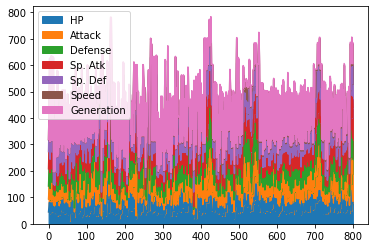

In [13]:
pok.plot.area()

En vista de los datos en la grafica podemos observar que el nivel de speed es el mayor o el que tiene mas rango en el total, por ende podemos decir y entender que los puntos mas importantes son el speed y el ataque en una ofensiva.

<AxesSubplot:ylabel='Frequency'>

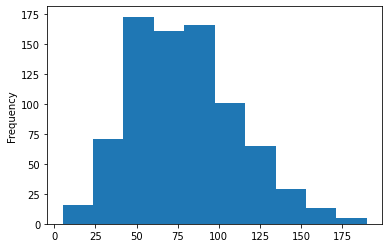

In [14]:
pok[pok['Speed'] < 231]['Attack'].plot.hist()

En esta gráfica la usamos para tomar los valores del intervalo de total de speed, dado que nos da los pokemones con mayor ataque y velocidad para mayor eficacia contra el rival y de los pokemones encontrados en ese intervalo vamos a extraer a los 5 más fuertes de cada tipo de pokemon.

<AxesSubplot:xlabel='Speed', ylabel='Attack'>

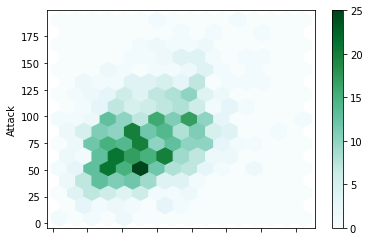

In [15]:
pok[pok['Speed'] < 231].plot.hexbin(x='Speed', y='Attack', gridsize=15)

Esta gráfica de puntos la usamos para ver que tan dispersos estan los tipos de pokemon en relación a ataque y velocidad para la hora de elegir a los 5 de cada tipo, exista una cantidad suficiente y justa.

Como conclusión, cambiamos de estrategia en la busqueda de los datos del puntaje de ataque y defensa, a buscar el ataque y la velocidad, ya que al buscar un pokemon para atacar con eficacia para vencer a tu rival encontramos que el pokemon con mayor ataque y velocidad en convinación del tipo de pokemon es mas fácil simplificar la lista, visto con los datos de la grafica de clasificación.